## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.501132  1.058621  1.479645 -1.159286  0.996059  0.681018
1 -0.870950  1.554831  1.622941  1.474458 -1.317442  1.453958
2  0.962931  0.932557 -0.652692 -1.064878 -0.471692  0.016945
3  0.719781 -0.282729  1.591650  0.789157 -1.014260  1.225240
4  1.742689  1.534262  1.125952  0.858855 -1.471014 -0.166259


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9404689	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9322055	total: 70ms	remaining: 34.9s
2:	learn: 0.9229756	total: 70.5ms	remaining: 23.4s
3:	learn: 0.9131500	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9030525	total: 71.7ms	remaining: 14.3s
5:	learn: 0.8948287	total: 72.3ms	remaining: 12s
6:	learn: 0.8850090	total: 72.8ms	remaining: 10.3s
7:	learn: 0.8740878	total: 73.5ms	remaining: 9.11s
8:	learn: 0.8660433	total: 74ms	remaining: 8.15s
9:	learn: 0.8568137	total: 74.5ms	remaining: 7.38s
10:	learn: 0.8475050	total: 75ms	remaining: 6.75s
11:	learn: 0.8392297	total: 75.5ms	remaining: 6.22s
12:	learn: 0.8309618	total: 76ms	remaining: 5.77s
13:	learn: 0.8240486	total: 76.4ms	remaining: 5.38s
14:	learn: 0.8169407	total: 76.9ms	remaining: 5.05s
15:	learn: 0.8097760	total: 77.4ms	remaining: 4.76s
16:	learn: 0.8034676	total: 77.9ms	remaining: 4.51s
17:	learn: 0.7976397	total: 78.5ms	remaining: 4.28s
18:	learn: 0.7893001	total: 79ms	remaining: 4.08s
19:	

80:	learn: 0.4648344	total: 108ms	remaining: 1.23s
81:	learn: 0.4613498	total: 109ms	remaining: 1.22s
82:	learn: 0.4569531	total: 109ms	remaining: 1.21s
83:	learn: 0.4528310	total: 110ms	remaining: 1.2s
84:	learn: 0.4486805	total: 110ms	remaining: 1.19s
85:	learn: 0.4454969	total: 111ms	remaining: 1.18s
86:	learn: 0.4418326	total: 111ms	remaining: 1.17s
87:	learn: 0.4378857	total: 111ms	remaining: 1.16s
88:	learn: 0.4340981	total: 112ms	remaining: 1.14s
89:	learn: 0.4309277	total: 112ms	remaining: 1.14s
90:	learn: 0.4268291	total: 113ms	remaining: 1.13s
91:	learn: 0.4229898	total: 113ms	remaining: 1.12s
92:	learn: 0.4197802	total: 114ms	remaining: 1.11s
93:	learn: 0.4164916	total: 114ms	remaining: 1.1s
94:	learn: 0.4132009	total: 114ms	remaining: 1.09s
95:	learn: 0.4101862	total: 115ms	remaining: 1.08s
96:	learn: 0.4072204	total: 115ms	remaining: 1.07s
97:	learn: 0.4043556	total: 116ms	remaining: 1.06s
98:	learn: 0.4010623	total: 116ms	remaining: 1.05s
99:	learn: 0.3983670	total: 116ms

251:	learn: 0.1342621	total: 187ms	remaining: 556ms
252:	learn: 0.1331506	total: 188ms	remaining: 555ms
253:	learn: 0.1321392	total: 188ms	remaining: 554ms
254:	learn: 0.1310809	total: 189ms	remaining: 552ms
255:	learn: 0.1302190	total: 190ms	remaining: 551ms
256:	learn: 0.1295534	total: 190ms	remaining: 550ms
257:	learn: 0.1285550	total: 191ms	remaining: 549ms
258:	learn: 0.1277534	total: 191ms	remaining: 547ms
259:	learn: 0.1268478	total: 192ms	remaining: 546ms
260:	learn: 0.1260928	total: 192ms	remaining: 544ms
261:	learn: 0.1250481	total: 192ms	remaining: 542ms
262:	learn: 0.1242255	total: 193ms	remaining: 540ms
263:	learn: 0.1233084	total: 193ms	remaining: 538ms
264:	learn: 0.1224051	total: 194ms	remaining: 537ms
265:	learn: 0.1215158	total: 194ms	remaining: 536ms
266:	learn: 0.1205035	total: 195ms	remaining: 534ms
267:	learn: 0.1197960	total: 195ms	remaining: 532ms
268:	learn: 0.1188765	total: 195ms	remaining: 531ms
269:	learn: 0.1179465	total: 196ms	remaining: 529ms
270:	learn: 

472:	learn: 0.0361067	total: 292ms	remaining: 325ms
473:	learn: 0.0358459	total: 293ms	remaining: 325ms
474:	learn: 0.0356748	total: 293ms	remaining: 324ms
475:	learn: 0.0355293	total: 293ms	remaining: 323ms
476:	learn: 0.0353575	total: 294ms	remaining: 322ms
477:	learn: 0.0351563	total: 294ms	remaining: 321ms
478:	learn: 0.0349856	total: 295ms	remaining: 321ms
479:	learn: 0.0348449	total: 295ms	remaining: 320ms
480:	learn: 0.0346744	total: 296ms	remaining: 319ms
481:	learn: 0.0344292	total: 296ms	remaining: 318ms
482:	learn: 0.0343575	total: 297ms	remaining: 318ms
483:	learn: 0.0341182	total: 297ms	remaining: 317ms
484:	learn: 0.0340478	total: 298ms	remaining: 316ms
485:	learn: 0.0338143	total: 298ms	remaining: 315ms
486:	learn: 0.0337452	total: 299ms	remaining: 314ms
487:	learn: 0.0336770	total: 299ms	remaining: 314ms
488:	learn: 0.0335206	total: 299ms	remaining: 313ms
489:	learn: 0.0333197	total: 300ms	remaining: 312ms
490:	learn: 0.0332529	total: 300ms	remaining: 311ms
491:	learn: 

645:	learn: 0.0192250	total: 371ms	remaining: 203ms
646:	learn: 0.0191488	total: 372ms	remaining: 203ms
647:	learn: 0.0191259	total: 372ms	remaining: 202ms
648:	learn: 0.0191129	total: 373ms	remaining: 202ms
649:	learn: 0.0190316	total: 373ms	remaining: 201ms
650:	learn: 0.0190205	total: 374ms	remaining: 200ms
651:	learn: 0.0189070	total: 374ms	remaining: 200ms
652:	learn: 0.0188943	total: 375ms	remaining: 199ms
653:	learn: 0.0187827	total: 375ms	remaining: 198ms
654:	learn: 0.0187610	total: 376ms	remaining: 198ms
655:	learn: 0.0186696	total: 376ms	remaining: 197ms
656:	learn: 0.0185958	total: 377ms	remaining: 197ms
657:	learn: 0.0185835	total: 377ms	remaining: 196ms
658:	learn: 0.0185623	total: 377ms	remaining: 195ms
659:	learn: 0.0184878	total: 379ms	remaining: 195ms
660:	learn: 0.0183987	total: 379ms	remaining: 194ms
661:	learn: 0.0183128	total: 379ms	remaining: 194ms
662:	learn: 0.0182417	total: 380ms	remaining: 193ms
663:	learn: 0.0182209	total: 380ms	remaining: 192ms
664:	learn: 

863:	learn: 0.0101151	total: 476ms	remaining: 75ms
864:	learn: 0.0100727	total: 477ms	remaining: 74.4ms
865:	learn: 0.0100426	total: 477ms	remaining: 73.9ms
866:	learn: 0.0100241	total: 478ms	remaining: 73.3ms
867:	learn: 0.0099922	total: 478ms	remaining: 72.7ms
868:	learn: 0.0099742	total: 479ms	remaining: 72.1ms
869:	learn: 0.0099515	total: 479ms	remaining: 71.6ms
870:	learn: 0.0099293	total: 480ms	remaining: 71.1ms
871:	learn: 0.0099075	total: 480ms	remaining: 70.5ms
872:	learn: 0.0098861	total: 481ms	remaining: 69.9ms
873:	learn: 0.0098651	total: 481ms	remaining: 69.4ms
874:	learn: 0.0098445	total: 482ms	remaining: 68.8ms
875:	learn: 0.0098037	total: 482ms	remaining: 68.2ms
876:	learn: 0.0097836	total: 482ms	remaining: 67.7ms
877:	learn: 0.0097414	total: 483ms	remaining: 67.1ms
878:	learn: 0.0097038	total: 483ms	remaining: 66.5ms
879:	learn: 0.0096640	total: 484ms	remaining: 66ms
880:	learn: 0.0096485	total: 484ms	remaining: 65.4ms
881:	learn: 0.0096333	total: 485ms	remaining: 64.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

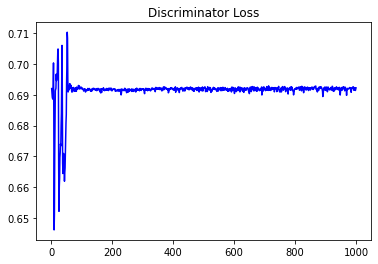

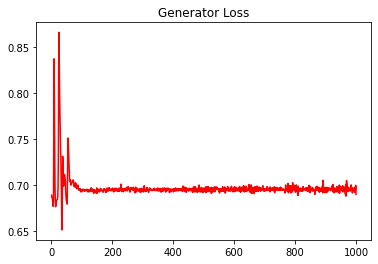

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10477053326533463


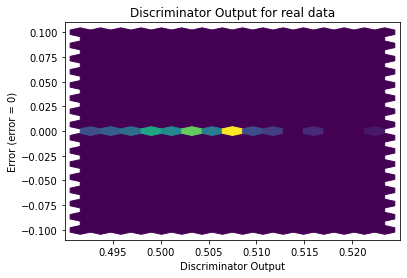

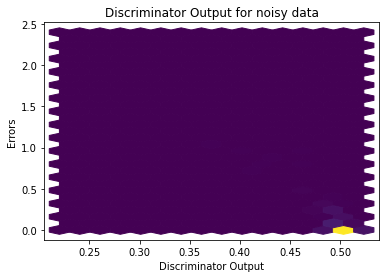

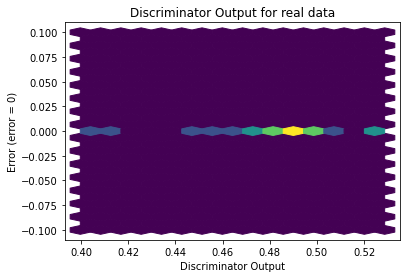

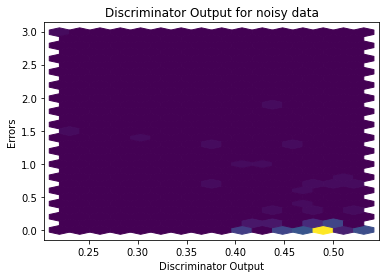

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


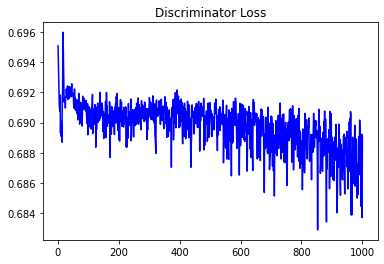

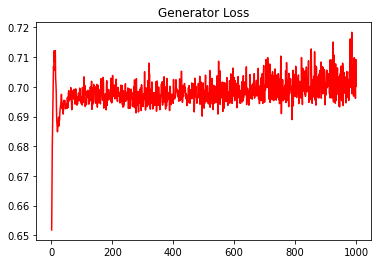

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05140658609875386


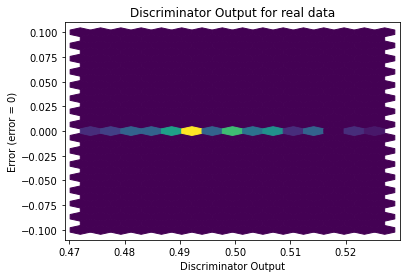

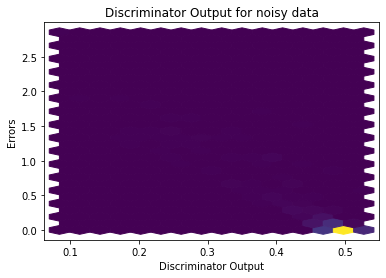

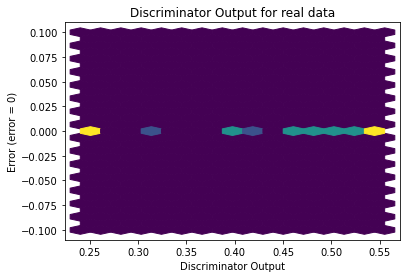

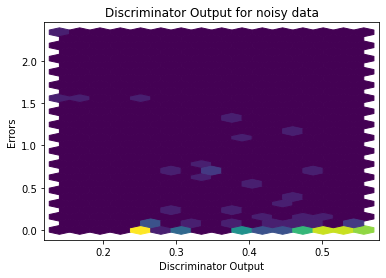

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1136]], requires_grad=True)
